# Entrega 1 - Data Mining Project
## Integrantes
* Wenyi He
* Leonardo Olivares

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
from sklearn.preprocessing import MinMaxScaler
# import cartopy.crs as ccrs
# import cartopy.io.shapereader as shpreader
import itertools
import matplotlib as mpl
import matplotlib.patches as mpatches

# Pre-Processing

In [2]:
df2017 = pd.read_csv("2017/survey_results_public.csv")
df2018 = pd.read_csv("2018/survey_results_public.csv")

/Users/EnriqueOlivares/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
column_2017 = list(df2017.columns.values)
column_2018 = list(df2018.columns.values)

In [4]:
df2017.rename(columns={
    'EmploymentStatus': 'Employment',
    'MajorUndergrad': 'UndergradMajor',
    'DeveloperType': 'DevType',
    'YearsProgram': 'YearsCoding',
    'YearsCodedJobPast' : 'YearsCodingProf',
    'JobSatisfaction' : 'JobSatisfaction',
    'CareerSatisfaction' : 'CareerSatisfaction',
    'JobSeekingStatus' : 'JobSearchStatus',
    'LastNewJob' : 'LastNewJob',
    'EducationTypes' : 'EducationTypes',
    'SelfTaughtTypes' : 'SelfTaughtTypes',
    'TimeAfterBootcamp' : 'TimeAfterBootcamp',
    'KinshipDevelopers' : 'AgreeDisagree1',
    'CompetePeers' : 'AgreeDisagree2',
    'HaveWorkedLanguage' : 'LanguageWorkedWith',
    'WantWorkLanguage' : 'LanguageDesireNextYear',
    'HaveWorkedDatabase' : 'DatabaseWorkedWith',
    'WantWorkDatabase' : 'DatabaseDesireNextYear',
    'HaveWorkedPlatform' : 'PlatformWorkedWith',
    'WantWorkPlatform' : 'PlatformDesireNextYear',
    'HaveWorkedFramework' : 'FrameworkWorkedWith',
    'WantWorkFramework' : 'FrameworkDesireNextYear',
    'IDE' : 'IDE',
    'Methodology' : 'Methodology',
    'VersionControl' : 'VersionControl',
    'CheckInCode' : 'CheckInCode',
    'Gender' : 'Gender',
    'HighestEducationParents' : 'EducationParents',
    'Race' : 'RaceEthnicity',
}, inplace=True)

In [5]:
df2017["SurveyYear"] = 2017
df2017["Hobby"] = False
df2017["OpenSource"] = False
df2018["SurveyYear"] = 2018

In [6]:
for counter, option in enumerate(df2017["ProgramHobby"]):
    if option == 'Yes, both':
        df2017.set_value(counter, "Hobby", True)
        df2017.set_value(counter, "OpenSource", True)
    elif option == "Yes, I program as a hobby":
        df2017.set_value(counter, "Hobby", True)
    elif option == "Yes, I contribute to open source projects":
        df2017.set_value(counter, "OpenSource", True)
set_2017_2018 = [df2017, df2018]
df = pd.concat(set_2017_2018,  join="inner")
df = df.reset_index()

In [7]:
df = df.drop("Respondent", 1)
df.shape

(150247, 38)

In [8]:
# Set Hobby values to True or False
mask = df.Hobby == "Yes"
column_name = 'Hobby'
df.loc[mask, column_name] = True

mask = df.Hobby == "No"
column_name = 'Hobby'
df.loc[mask, column_name] = False

In [9]:
# Set OpenSource values to True or False
mask = df.OpenSource == "Yes"
column_name = 'OpenSource'
df.loc[mask, column_name] = True

mask = df.OpenSource == "No"
column_name = 'OpenSource'
df.loc[mask, column_name] = False

In [10]:
df_pre_separated = df.copy()#DevType Columns
a = df["DevType"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_").replace("-", "_"))
    except AttributeError:
        continue

for i in lista_attr:
    df[i]=False

for c, i in enumerate(a):
    try:
        if isinstance(i, str):
            types = i.split(";")
            for l in types: 
                df.set_value(c, l.strip().replace(" ", "_").replace("-", "_"), True)
    except AttributeError:
        continue
        
#Remove DevType

df = df.drop("DevType", 1)

In [11]:
#Standardize YearsCoding values
changes = {
    'Less than a year': '0-2 years',
    '1 to 2 years': '0-2 years',
    '2 to 3 years': '0-2 years',
    '3 to 4 years': '3-5 years',
    '4 to 5 years': '3-5 years',
    '5 to 6 years': '3-5 years',
    '6 to 7 years': '6-8 years',
    '7 to 8 years': '6-8 years',
    '8 to 9 years': '6-8 years',
    '9 to 10 years': '9-11 years',
    '10 to 11 years': '9-11 years',
    '11 to 12 years': '9-11 years',
    '12 to 13 years': '12-14 years',
    '13 to 14 years': '12-14 years',
    '14 to 15 years': '12-14 years',
    '15 to 16 years': '15-17 years',
    '16 to 17 years': '15-17 years',
    '17 to 18 years': '15-17 years',
    '18 to 19 years': '18-20 years',
    '19 to 20 years': '18-20 years',
    '21-23 years': '20 or more years',
    '24-26 years': '20 or more years',
    '27-29 years': '20 or more years',
    '30 or more years': '20 or more years',
    True: np.nan
}


for year_range in changes :
    mask = df.YearsCoding == year_range
    column_name = 'YearsCoding'
    df.loc[mask, column_name] = changes[year_range]

In [12]:
#Standardize YearsCodingProf values
changes = {
    'Less than a year': '0-2 years',
    '1 to 2 years': '0-2 years',
    '2 to 3 years': '0-2 years',
    '3 to 4 years': '3-5 years',
    '4 to 5 years': '3-5 years',
    '5 to 6 years': '3-5 years',
    '6 to 7 years': '6-8 years',
    '7 to 8 years': '6-8 years',
    '8 to 9 years': '6-8 years',
    '9 to 10 years': '9-11 years',
    '10 to 11 years': '9-11 years',
    '11 to 12 years': '9-11 years',
    '12 to 13 years': '12-14 years',
    '13 to 14 years': '12-14 years',
    '14 to 15 years': '12-14 years',
    '15 to 16 years': '15-17 years',
    '16 to 17 years': '15-17 years',
    '17 to 18 years': '15-17 years',
    '18 to 19 years': '18-20 years',
    '19 to 20 years': '18-20 years',
    '21-23 years': '20 or more years',
    '24-26 years': '20 or more years',
    '27-29 years': '20 or more years',
    '30 or more years': '20 or more years',
    True: np.nan
}


for year_range in changes :
    mask = df.YearsCodingProf == year_range
    column_name = 'YearsCodingProf'
    df.loc[mask, column_name] = changes[year_range]

In [13]:
#Standardize JobSatisfaction and CareerSatisfaction values
changes = {
    0.0: 'Extremely dissatisfied',
    1.0: 'Moderately dissatisfied',
    2.0: 'Moderately dissatisfied',
    3.0: 'Slightly dissatisfied',
    4.0: 'Slightly dissatisfied',
    5.0: 'Neither satisfied nor dissatisfied',
    6.0: 'Slightly satisfied',
    7.0: 'Slightly satisfied',
    8.0: 'Moderately satisfied',
    9.0: 'Moderately satisfied',
    10.0: 'Extremely satisfied',
    True: np.nan
}


for satis in changes :
    mask = df.JobSatisfaction == satis
    column_name = 'JobSatisfaction'
    df.loc[mask, column_name] = changes[satis]
    
for satis in changes:
    mask = df.CareerSatisfaction == satis
    column_name = 'CareerSatisfaction'
    df.loc[mask, column_name] = changes[satis]

In [14]:
#Standardize JobSearchStatus values
changes = {
    "I'm not actively looking, but I am open to new opportunities": 'I’m not actively looking, but I am open to new opportunities',
    True: np.nan
}


for status in changes :
    mask = df.JobSearchStatus == status
    column_name = 'JobSearchStatus'
    df.loc[mask, column_name] = changes[status]

In [15]:
#Standardize LastNewJob values
changes = {
    "I've never had a job": 'Not applicable/ never',
    True: np.nan
}


for status in changes :
    mask = df.LastNewJob == status
    column_name = 'LastNewJob'
    df.loc[mask, column_name] = changes[status]

In [16]:
# Set Currency values
mask = df.Currency == True
column_name = 'Currency'
df.loc[mask, column_name] = np.nan

mask = df.Currency == 'Indian rupees (?)'
column_name = 'Currency'
df.loc[mask, column_name] = 'Indian rupees (₹)'

mask = df.Currency == 'Russian rubles (?)'
column_name = 'Currency'
df.loc[mask, column_name] = 'Russian rubles (₽)'


In [17]:
#SaLARIO, 
df = df.drop("Salary", 1)


In [18]:
#EducationTypes Valores muy distintos
df = df.drop("EducationTypes", 1)

In [19]:
#SelfTaughtTypes Valores muy distintos
df = df.drop('SelfTaughtTypes', 1)


In [20]:
# Set TimeAfterBootcamp values
mask = df.TimeAfterBootcamp == "I haven't gotten a job as a developer yet"
column_name = 'TimeAfterBootcamp'
df.loc[mask, column_name] = 'I haven’t gotten a developer job'

mask = df.TimeAfterBootcamp == 'I already had a full-time job as a developer when I began the program'
column_name = 'TimeAfterBootcamp'
df.loc[mask, column_name] = 'I already had a job as a developer when I started the program'

mask = df.TimeAfterBootcamp == 'Immediately upon graduating'
column_name = 'TimeAfterBootcamp'
df.loc[mask, column_name] = 'Immediately after graduating'

In [21]:
#AgreeDisagree 1 y 2
mask = df.AgreeDisagree1 == True
column_name = 'AgreeDisagree1'
df.loc[mask, column_name] = np.nan

mask = df.AgreeDisagree2 == True
column_name = 'AgreeDisagree2'
df.loc[mask, column_name] = np.nan

In [22]:
#LanguageWorkedWith Columns
a = df["LanguageWorkedWith"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_Worked")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_Worked", True)
    except AttributeError:
        continue
        
#Remove LanguageWorkedWith

df = df.drop("LanguageWorkedWith", 1)

In [23]:
#LanguageDesire Columns
a = df["LanguageDesireNextYear"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_Desire")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_Desire", True)
    except AttributeError:
        continue
        
#Remove LanguageWorkedWith

df = df.drop("LanguageDesireNextYear", 1)

In [24]:
#DatabaseWorkedWith Columns
a = df["DatabaseWorkedWith"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_DB_Worked")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_DB_Worked", True)
    except AttributeError:
        continue
        
#Remove LanguageWorkedWith

df = df.drop("DatabaseWorkedWith", 1)

In [25]:
#DatabaseDesireNextYear Columns
a = df["DatabaseDesireNextYear"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_DB_Desire")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_DB_Desire", True)
    except AttributeError:
        continue
        
#Remove LanguageWorkedWith

df = df.drop("DatabaseDesireNextYear", 1)

In [26]:
#PlatformWorkedWith Columns
a = df["PlatformWorkedWith"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_Plat_Worked")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_Plat_Worked", True)
    except AttributeError:
        continue
        
#Remove PlatformWorkedWith

df = df.drop("PlatformWorkedWith", 1)

In [27]:
#PlatformWorkedWith Columns
a = df["PlatformDesireNextYear"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_Plat_Desired")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_Plat_Desired", True)
    except AttributeError:
        continue
        
#Remove PlatformDesireNextYear

df = df.drop("PlatformDesireNextYear", 1)

In [28]:
#IDE Columns
a = df["IDE"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_IDE")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_IDE", True)
    except AttributeError:
        continue
        
#Remove IDE

df = df.drop("IDE", 1)

In [29]:
#FrameworkWorkedWith Columns
a = df["FrameworkWorkedWith"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_Frame_Worked")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_Frame_Worked", True)
    except AttributeError:
        continue
        
#Remove FrameworkWorkedWith

df = df.drop("FrameworkWorkedWith", 1)

In [30]:
#FrameworkDesireNextYear Columns
a = df["FrameworkDesireNextYear"]

lista_attr = set()
for i in a:

    try:
        k = i.split(";")
        for j in k:
            lista_attr.add(j.strip().replace(" ", "_")+"_Frame_Desire")
    except AttributeError:
        continue
        
for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        types = i.split(";")
        for l in types: 
            df.set_value(c, l.strip().replace(" ", "_")+"_Frame_Desire", True)
    except AttributeError:
        continue
        
#Remove FrameworkDesireNextYear

df = df.drop("FrameworkDesireNextYear", 1)

In [31]:
#Methodology Columns
a = df["Methodology"]

lista_attr = set()
for i in a:

    try:
        if isinstance(i, str):
            k = i.split(";")
            for j in k:
                lista_attr.add(j.strip().replace(" ", "_").replace("-", "_")+"_Method")
    except AttributeError:
        continue

for i in lista_attr:
    df[i]=False
    
for c, i in enumerate(a):
    try:
        if isinstance(i, str):
            types = i.split(";")
            for l in types: 
                df.set_value(c, l.strip().replace(" ", "_").replace("-", "_")+"_Method", True)
    except AttributeError:
        continue
        
#Remove Methodology

df = df.drop("Methodology", 1)

In [32]:
#VersionControl Columns
a = df["VersionControl"]

lista_attr = set()
for i in a:

    try:
        if isinstance(i, str):
            k = i.split(";")
            for j in k:
                lista_attr.add(j.strip().replace(" ", "_").replace("-", "_")+"_VC")
    except AttributeError:
        continue

for i in lista_attr:
    df[i]=False


for c, i in enumerate(a):
    try:
        if isinstance(i, str):
            types = i.split(";")
            for l in types: 
                df.set_value(c, l.strip().replace(" ", "_").replace("-", "_")+"_VC", True)
    except AttributeError:
        continue
        
#Remove VersionControl

df = df.drop("VersionControl", 1)

In [33]:
#Standardize CheckInCode values
changes = {
    'A few times per week': 'A few times a week',
    'Multiple times per day': 'Multiple times a day'
}


for satis in changes :
    mask = df.CheckInCode == satis
    column_name = 'CheckInCode'
    df.loc[mask, column_name] = changes[satis]
    
for satis in changes:
    mask = df.CheckInCode == satis
    column_name = 'CheckInCode'
    df.loc[mask, column_name] = changes[satis]

In [34]:
#Standardize EducationParents values
changes = {
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': "A master's degree",
    'Some college/university study without earning a degree': "Some college/university study, no bachelor's degree",
    'Professional degree (JD, MD, etc.)': 'A professional degree',
    'Bachelor’s degree (BA, BS, B.Eng., etc.)': "A bachelor's degree",
    'Other doctoral degree (Ph.D, Ed.D., etc.)': 'A doctoral degree',
    'They never completed any formal education': 'No education',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High school'
    
}


for satis in changes :
    mask = df.EducationParents == satis
    column_name = 'EducationParents'
    df.loc[mask, column_name] = changes[satis]


In [35]:
#RaceEthnicity Columns
a = df["RaceEthnicity"]

lista_attr = set()
for i in a:

    try:
        if isinstance(i, str):
            k = i.split(";")
            for j in k:
                lista_attr.add(j.strip().replace(" ", "_").replace("-", "_")+"_Race")
    except AttributeError:
        continue

for i in lista_attr:
    df[i]=False

    
for c, i in enumerate(a):
    try:
        if isinstance(i, str):
            types = i.split(";")
            for l in types: 
                df.set_value(c, l.strip().replace(" ", "_").replace("-", "_")+"_Race", True)
    except AttributeError:
        continue
        
#Remove RaceEthnicity

df = df.drop("RaceEthnicity", 1)

In [36]:
# Ca
df = df.dropna(thresh=315)

# Visualizaciones

## Version Control por país
Se quiere visualizar los países con más desarrolladores que no ocupan Version Control.

In [37]:
df_country_vc = df.loc[:, ["Country", 'I_don\'t_use_version_control_VC',]]
df_country_vc["Counter"] = 1
df_country_vc = df_country_vc.groupby("Country").sum()
df_country_vc["percentage"] = df_country_vc["I_don\'t_use_version_control_VC"] / df_country_vc["Counter"]
df_country_vc[["percentage"]] = scaler.fit_transform(df_country_vc[["percentage"]] )

NameError: name 'scaler' is not defined

In [38]:
Greens = plt.get_cmap('Greens')
Blues = plt.get_cmap('Blues')

In [39]:
df_country_vc["percentage"] = df_country_vc["percentage"].apply(lambda x: Blues(x))

In [40]:
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    try:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                facecolor=df_country_vc.loc[country.attributes['NAME_LONG'], "percentage"],
                label=country.attributes['NAME_LONG'])
    except KeyError:
        continue

plt.title("Porcentaje de desarrolladores que no usan Version Control por país")
plt.show()

NameError: name 'shpreader' is not defined

Este fenómeno también se puede observar usando las razas de los usuarios de StackOverflow, donde los africanos no suelen usar version control

In [41]:
vc_race = ['Visual_Source_Safe_VC',
'Git_VC',
'Subversion_VC',
'I_don\'t_use_version_control_VC',
'I_use_some_other_system_VC',
'Copying_and_pasting_files_to_network_shares_VC',
'Team_Foundation_Version_Control_VC',
'Mercurial_VC',
'Rational_ClearCase_VC',
'Zip_file_back_ups_VC',
'Team_Foundation_Server_VC',
'I_prefer_not_to_say_Race',
'East_Asian_Race',
'Hispanic_or_Latino/Latina_Race',
'Native_American,_Pacific_Islander,_or_Indigenous_Australian_Race',
'Middle_Eastern_Race',
'Black_or_of_African_descent_Race',
'White_or_of_European_descent_Race',
'I_don’t_know_Race',
'South_Asian_Race',]
df_vc_race = df.loc[:,vc_race]

In [42]:
vc = ['Visual_Source_Safe_VC',
'Git_VC',
'Subversion_VC',
'I_don\'t_use_version_control_VC',
'I_use_some_other_system_VC',
'Copying_and_pasting_files_to_network_shares_VC',
'Team_Foundation_Version_Control_VC',
'Mercurial_VC',
'Rational_ClearCase_VC',
'Zip_file_back_ups_VC',
'Team_Foundation_Server_VC',]
race = ['I_prefer_not_to_say_Race',
'East_Asian_Race',
'Hispanic_or_Latino/Latina_Race',
'Native_American,_Pacific_Islander,_or_Indigenous_Australian_Race',
'Middle_Eastern_Race',
'Black_or_of_African_descent_Race',
'White_or_of_European_descent_Race',
'I_don’t_know_Race',
'South_Asian_Race',]
vc_race_vis = pd.DataFrame(0, columns=race, index=vc)

In [43]:
for r in vc:
    vc_race_vis.loc[r] = df_vc_race.groupby(r).sum().loc[[1], race].values.astype(int)
scaler = MinMaxScaler()
vc_race_vis_without_git = vc_race_vis.drop("Git_VC")
vc_race_vis[vc_race_vis.columns] = scaler.fit_transform(vc_race_vis[vc_race_vis.columns] )
vc_race_vis_without_git[vc_race_vis.columns] = scaler.fit_transform(vc_race_vis_without_git[vc_race_vis_without_git.columns] )

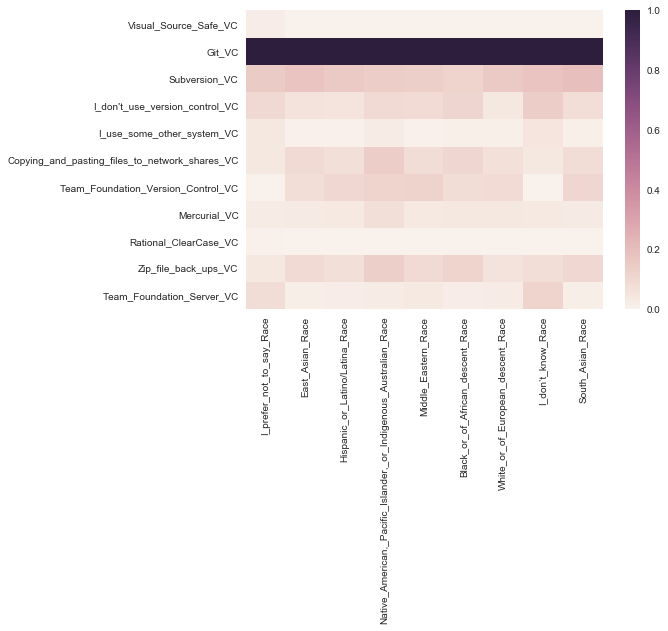

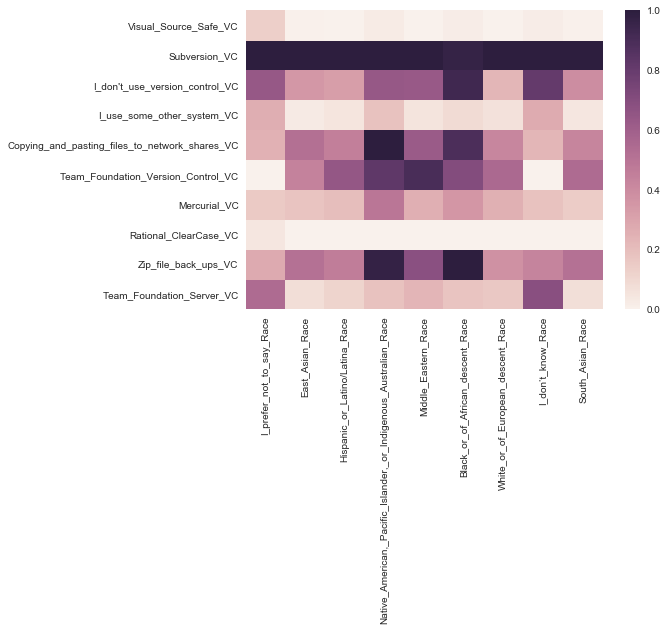

In [44]:
sns.heatmap(vc_race_vis)
plt.show()
sns.heatmap(vc_race_vis_without_git)
plt.show()

## Preferencia de IDE por país
Por cada país se muestra el IDE más popular

In [45]:
ide_country = ['Country',
               'Notepad++_IDE',
                'Android_Studio_IDE',
                'Sublime_Text_IDE',
                'Zend_IDE',
                'PHPStorm_IDE',
                'Light_Table_IDE',
                'Coda_IDE',
                'Visual_Studio_IDE',
                'Atom_IDE',
                'Visual_Studio_Code_IDE',
                'Xcode_IDE',
                'NetBeans_IDE',
                'IntelliJ_IDE',
                'Vim_IDE',
                'RStudio_IDE',
                'TextMate_IDE',
                'Komodo_IDE',
                'Eclipse_IDE',
                'PyCharm_IDE',
                'RubyMine_IDE',
                'IPython_/_Jupyter_IDE',
                'Emacs_IDE',]
df_country_ide = df.loc[:, ide_country]
df_country_ide = df_country_ide.groupby("Country").sum()
df_country_ide['Max'] = df_country_ide.idxmax(axis=1)
df_country_ide = df_country_ide.loc[:,["Max"]]

In [46]:
N = 14 # Number of labels

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

colors = []
for i in range(14):
    colors.append(cmap(i/14))

In [47]:
ide_color = dict(zip(df_country_ide['Max'].unique().tolist(), colors))
df_country_ide["Color"] = df_country_ide["Max"].map(ide_color)

In [48]:
df_country_ide_col = df_country_ide.loc[:, ["Color"]]

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)
plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    try:
        if country.attributes['NAME_LONG'] != "Antarctica":
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                    facecolor=df_country_ide_col.loc[country.attributes['NAME_LONG'], "Color"],
                    label=country.attributes['NAME_LONG'])
    except KeyError:
        continue
        
patchList = []
for key in ide_color:
        data_key = mpatches.Patch(color=ide_color[key], label=key)
        patchList.append(data_key)

legend = plt.legend(handles=patchList, loc=3, fontsize='large')
plt.title("Preferencia IDE por país")
plt.show()

NameError: name 'shpreader' is not defined

In [49]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [50]:
devtypes = set()
for x in df2018['DevType']:
    if isinstance(x, str):
        devtypes.update(x.split(";"))

dt = df.iloc[:,22:52]
dt

devtypes = dt.columns.unique()

langs = df.iloc[:,53:95]
languages = ['JavaScript', 'HTML', 'SQL', 'Java', 'C', 'PHP', 'Python', 'Objective-C', 'C++', 'Ruby']

qty = list()
for d_type in devtypes:
    info = list()
    
    for language in languages:
        d = df[df[d_type]==True]
        d = d[d[language+"_Worked"]==True]
        info.append(d[language+"_Worked"].count())
    suma = np.sum(info)
    info = [x/suma for x in info]
    qty.append(info)

qty = np.array(qty)


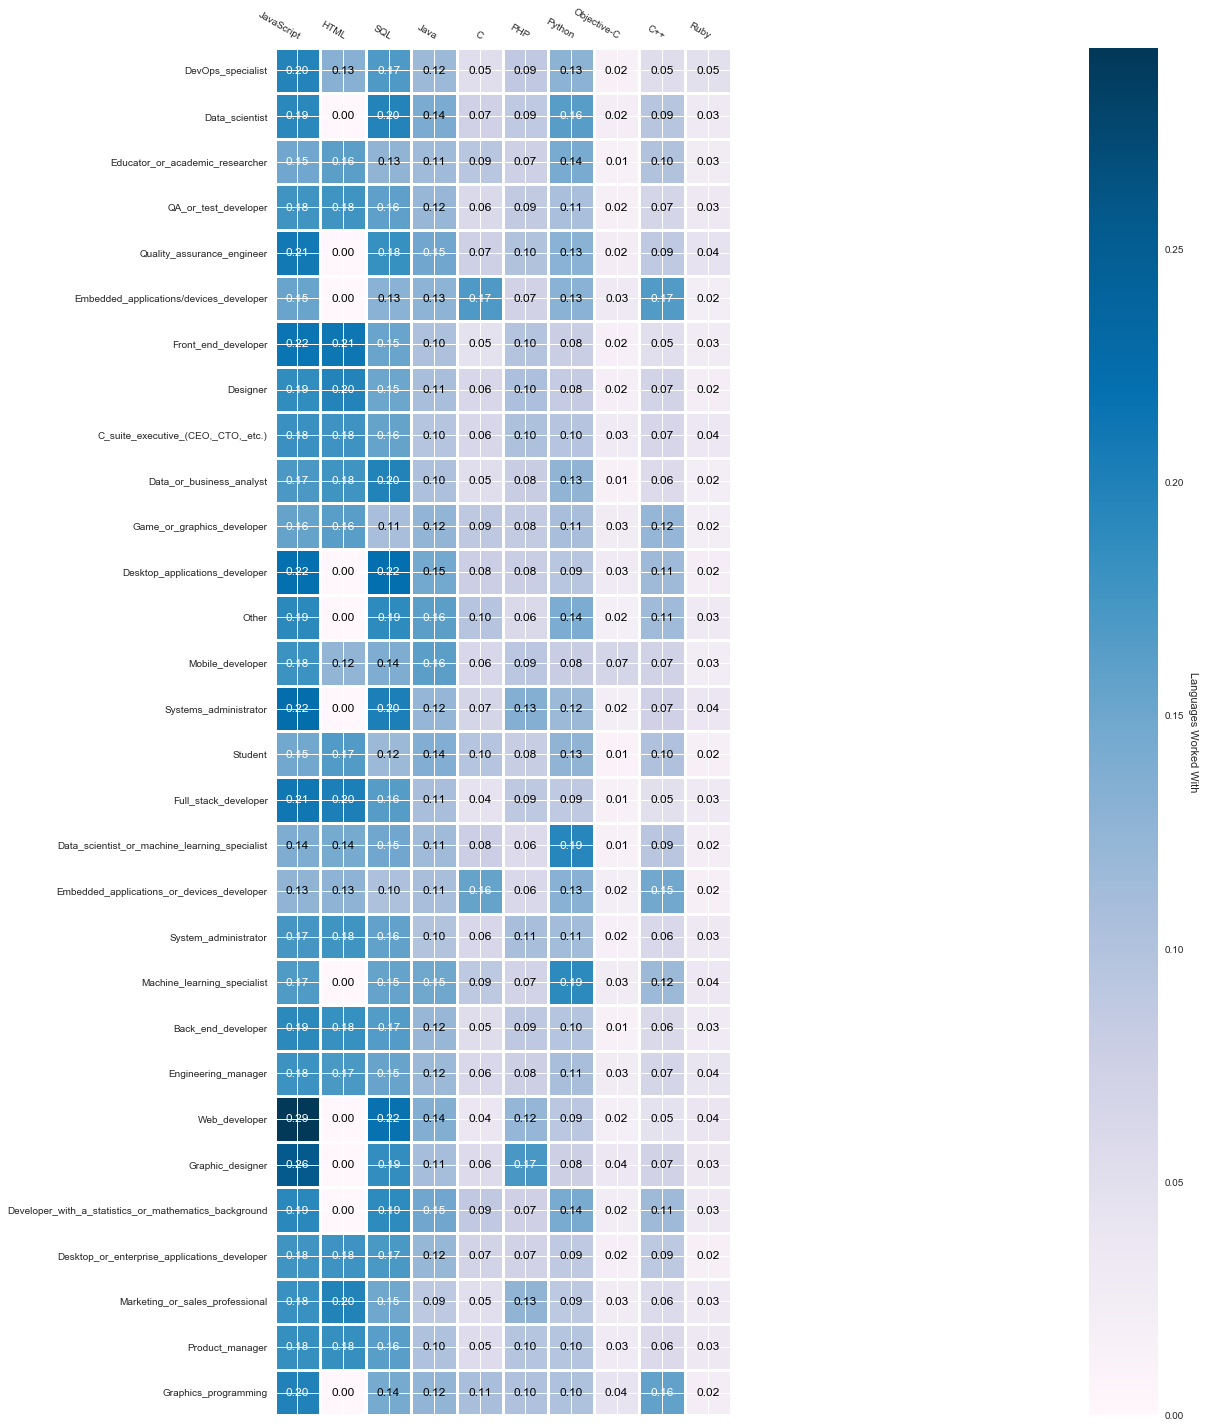

In [51]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(100)

im, cbar = heatmap(qty, devtypes, languages, ax=ax,
                   cmap="PuBu", cbarlabel="Languages Worked With")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()

In [52]:
d_langs = df.iloc[:,95:137]
d_languages = ['JavaScript', 'HTML', 'SQL', 'Java', 'C', 'PHP', 'Python', 'Objective-C', 'C++', 'Ruby']

qty2 = list()
for d_type in devtypes:
    info = list()
    
    for language in d_languages:
        d = df[df[d_type]==True]
        d = d[d[language+"_Desire"]==True]
        info.append(d[language+"_Desire"].count())
    suma = np.sum(info)
    info = [x/suma for x in info]
    qty2.append(info)

qty2 = np.array(qty2)


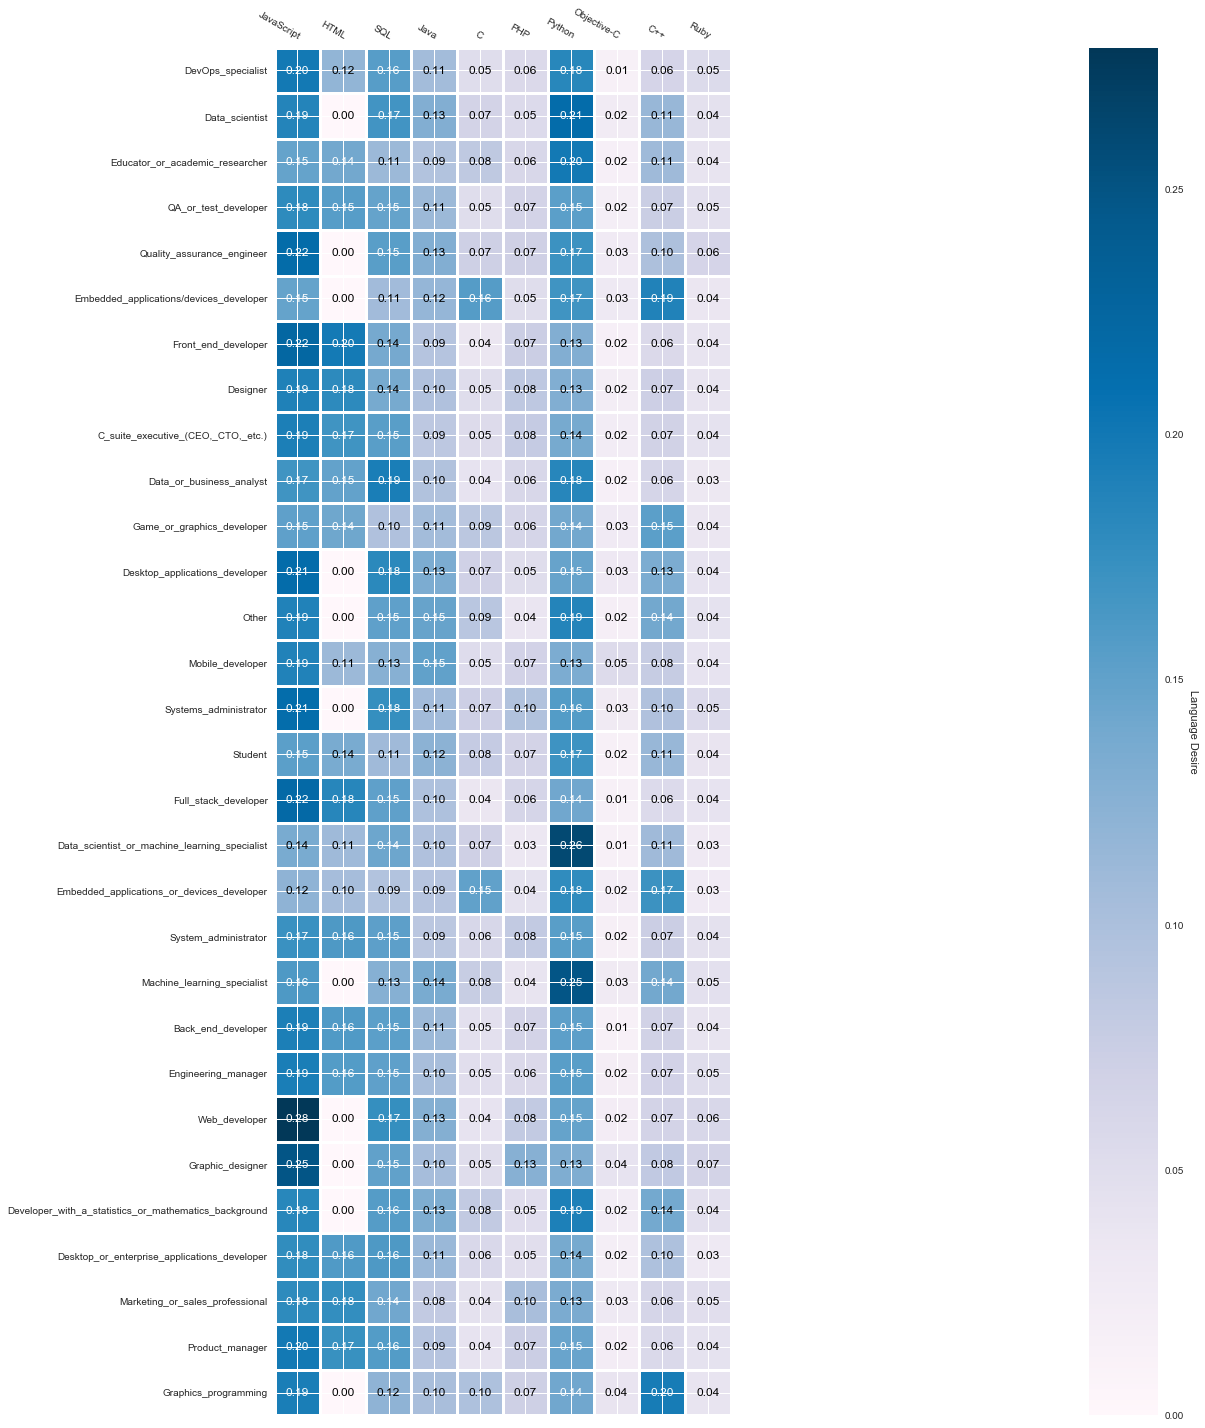

In [53]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(100)

im, cbar = heatmap(qty2, devtypes, d_languages, ax=ax,
                   cmap="PuBu", cbarlabel="Language Desire")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()

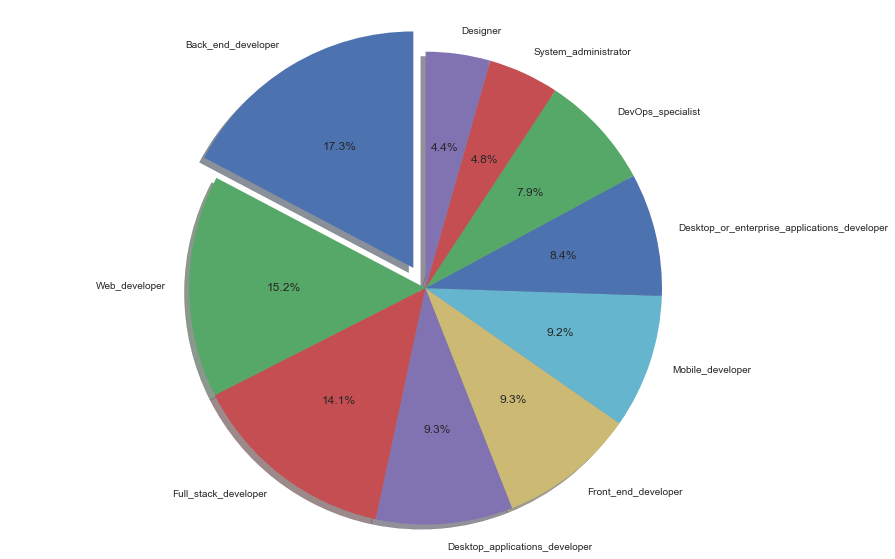

In [54]:
labels = devtypes

fracs = []


di = dict()

for t in labels:
    d = df[df['YearsCoding']=='20 or more years']
    d = d[d[t]==True]
    c = d[t].count()
    fracs.append(c)
    di[t] = c

labels = sorted(labels, key=lambda x:di[x], reverse=True)
fracs = [di[x] for x in labels]

labels = labels[:10]
fracs = fracs[:10]
explode=[0 for _ in labels]
explode[0] = 0.1

fig1, ax1 = plt.subplots()
fig1.set_figheight(10)
fig1.set_figwidth(15)
ax1.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

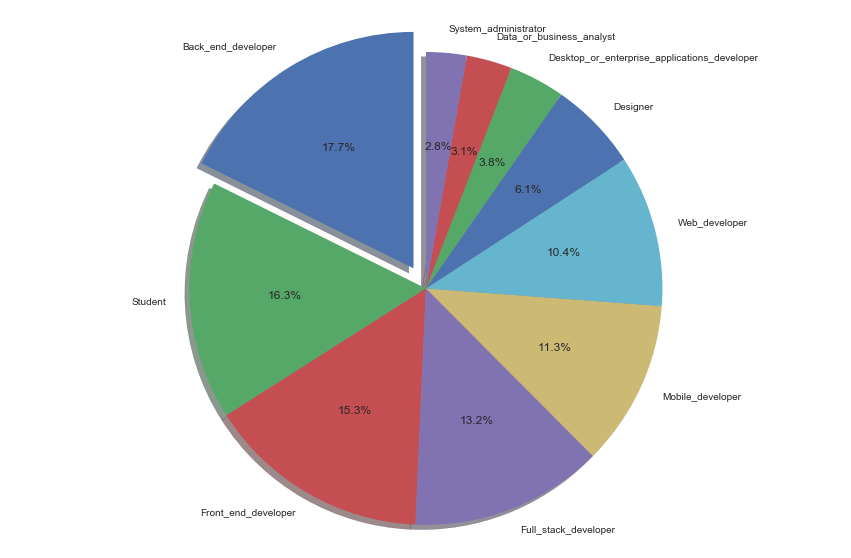

In [55]:
labels = devtypes

fracs = []


di = dict()

for t in labels:
    d = df[df['YearsCoding']=='0-2 years']
    d = d[d[t]==True]
    c = d[t].count()
    fracs.append(c)
    di[t] = c

labels = sorted(labels, key=lambda x:di[x], reverse=True)
fracs = [di[x] for x in labels]

labels = labels[:10]
fracs = fracs[:10]
explode=[0 for _ in labels]
explode[0] = 0.1

fig1, ax1 = plt.subplots()
fig1.set_figheight(10)
fig1.set_figwidth(15)
ax1.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [77]:
d1 = df[df['SurveyYear']==2017]
d2 = df[df['SurveyYear']==2018 and df['DevType'] in devtypes]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [62]:
df.columns.unique

<bound method Index.unique of Index(['index', 'Country', 'Employment', 'FormalEducation', 'UndergradMajor',
       'CompanySize', 'YearsCoding', 'YearsCodingProf', 'CareerSatisfaction',
       'JobSatisfaction',
       ...
       'Mercurial_VC', 'I_don’t_know_Race', 'East_Asian_Race',
       'South_Asian_Race',
       'Native_American,_Pacific_Islander,_or_Indigenous_Australian_Race',
       'Middle_Eastern_Race', 'Black_or_of_African_descent_Race',
       'I_prefer_not_to_say_Race', 'Hispanic_or_Latino/Latina_Race',
       'White_or_of_European_descent_Race'],
      dtype='object', length=325)>